In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [28]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
map_df = pd.read_csv("../measurements/real_bw_test_15fps/map.csv")
cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
mag_df = pd.read_csv("../measurements/real_bw_test_15fps/manager.csv")
static_map_df = pd.read_csv("../measurements/static_test_15fps/map.csv")
static_cha_df = pd.read_csv("../measurements/static_test_15fps/characteristic.csv")

In [29]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,feasible,sensitivity,map
0,0.25,1,2,6000000.0,0.3,1,-1,0.500000,0.500000
1,0.20,60,1,6000000.0,0.3,2,-1,0.333333,0.250000
2,0.25,3,3,6000000.0,0.3,3,-1,0.500000,0.500000
3,0.05,2,2,6000000.0,0.3,4,-1,0.600000,0.458333
4,0.05,5,2,6000000.0,0.3,5,-1,0.800000,0.708333


In [30]:
quality_level = []

for q in map_df["quality"]:
    if q>50:
        quality_level.append((q-50)/10)
    else:
        quality_level.append(q)

map_df["quality_level"] = quality_level

# Configuration

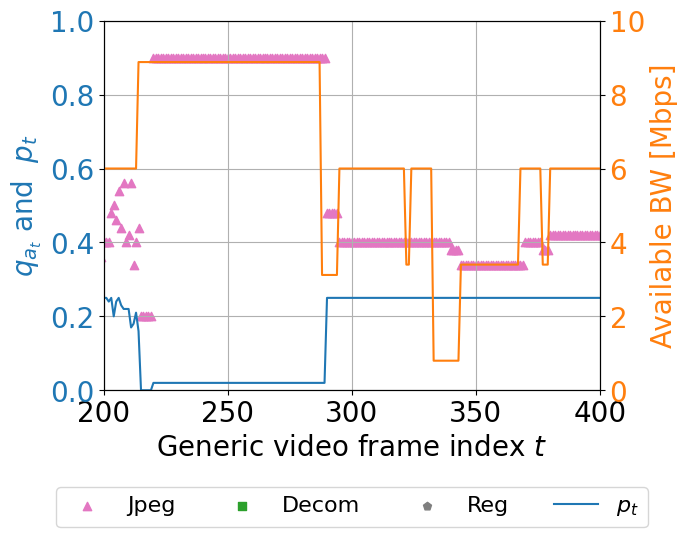

In [31]:
# fig, ax1 = plt.subplots(figsize=(6,4))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('$q_{a_t}$ and  $p_t$', color=color)

ax1.tick_params(axis='y', labelcolor=color)


# ax1.plot(map_df["frame_id"].to_numpy(),map_df["quality_level"].to_numpy(),color=color)
_jpeg_df = map_df[map_df["technique"] == 1]
ax1.scatter(_jpeg_df["frame_id"].to_numpy(),_jpeg_df["quality_level"].to_numpy()/5,color="tab:pink",marker="^", label="Jpeg")
_decom_df = map_df[map_df["technique"] == 2]
ax1.scatter(_decom_df["frame_id"].to_numpy(),_decom_df["quality_level"].to_numpy()/5,color="tab:green",marker="s", label="Decom")
_reg_df = map_df[map_df["technique"] == 3]
ax1.scatter(_reg_df["frame_id"].to_numpy(),_reg_df["quality_level"].to_numpy()/5,color="tab:gray",marker="p",label="Reg")
ax1.grid()
ax1.plot(map_df["frame_id"].to_numpy(),map_df["pruning_thresh"].to_numpy(), color=color, label="$p_t$")
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.grid()
ax1.set_xlim([200, 400])
ax2.set_ylim([0,10])
ax1.set_ylim([0,1])
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
# ax1.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_config.pdf", bbox_inches='tight')
# ax3 = ax2.twinx() 
# color = 'tab:purple'
# ax3.set_ylabel('Bandwidth [Mbps]', color=color)  # we already handled the x-label with ax1
# ax3.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax3.tick_params(axis='y', labelcolor=color)

# mAP drop

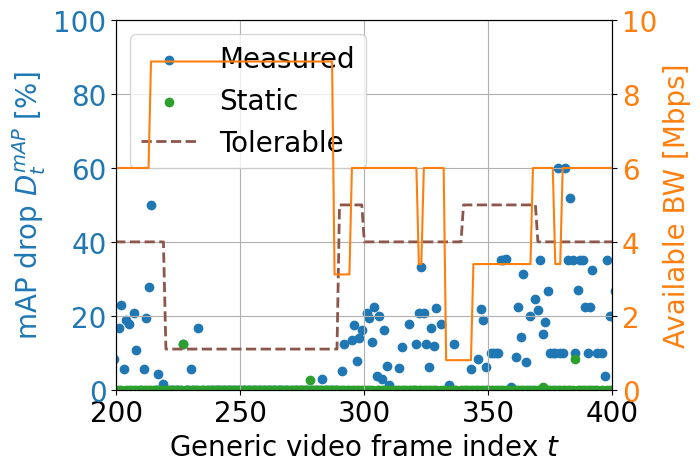

In [32]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('mAP drop $D^{mAP}_t$ [%]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

drops = (local_df["map"].to_numpy() - map_df["map"].to_numpy())*100
ax1.scatter(map_df["frame_id"].to_numpy(),drops,label="Measured", color="tab:blue")
drops2 = (local_df["map"].to_numpy() - static_map_df["map"].to_numpy())*100
ax1.scatter(static_map_df["frame_id"].to_numpy(),drops2,label="Static", color="tab:green")
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy()*100, linestyle='--', linewidth=2,color="tab:brown",label="Tolerable" )
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([0,100])
ax2.set_ylim([0,10])
ax1.grid()

# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_map_drop.pdf", bbox_inches='tight')

In [33]:
# temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

# temp.std()

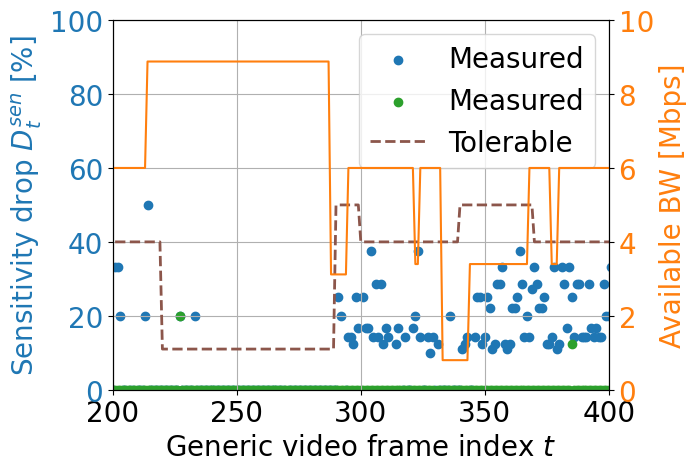

In [34]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Sensitivity drop $D^{sen}_t$ [%]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy())*100,label="Measured", color= color)
ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - static_map_df["sensitivity"].to_numpy())*100,label="Measured", color= "tab:green")
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy()*100, linestyle='--', linewidth=2,color="tab:brown",label="Tolerable" )

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([0,100])
ax2.set_ylim([0,10])
ax1.grid()
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_sensitivity_drop.pdf", bbox_inches='tight')

In [35]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

# Compression ratio

In [36]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.25,1,2,6000000.0,0.3,1,0.975453,-1,-1,-1,13.000000,26624,96130,1.121313,-1.0,-1.0,-1.0
1,0.20,60,1,6000000.0,0.3,2,0.947404,-1,-1,-1,36.938314,9370,10114,2.627372,-1.0,-1.0,-1.0
2,0.25,3,3,6000000.0,0.3,3,0.991621,-1,-1,-1,238.697931,1450,193472,2.913672,-1.0,-1.0,-1.0
3,0.05,2,2,6000000.0,0.3,4,0.561113,-1,-1,-1,6.500000,53248,169979,6.240761,-1.0,-1.0,-1.0
4,0.05,5,2,6000000.0,0.3,5,0.508702,-1,-1,-1,2.600000,133120,251396,9.867549,-1.0,-1.0,-1.0


In [37]:
mag_df.head()

,frame_id,bandwidth,drop,target_fps,technique,feasibility,target_cmp,target_snr,est_cmp,est_snr,pruning_thresh,quality,jpeg_F,decom_F,reg_F,opt_time
0,1,6000000.0,0.3,15,2,-1,-1.0,-1,-1.0,-1.0,0.25,1,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.285670
1,2,6000000.0,0.3,15,1,-1,-1.0,-1,-1.0,-1.0,0.20,60,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.061249
2,3,6000000.0,0.3,15,3,-1,-1.0,-1,-1.0,-1.0,0.25,3,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.049377
3,4,6000000.0,0.3,15,2,-1,-1.0,-1,-1.0,-1.0,0.05,2,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.093282
4,5,6000000.0,0.3,15,2,-1,-1.0,-1,-1.0,-1.0,0.05,5,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.060929


In [38]:
# raw_tensor_size = 128*26*26*4 # bytes
# cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
# static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

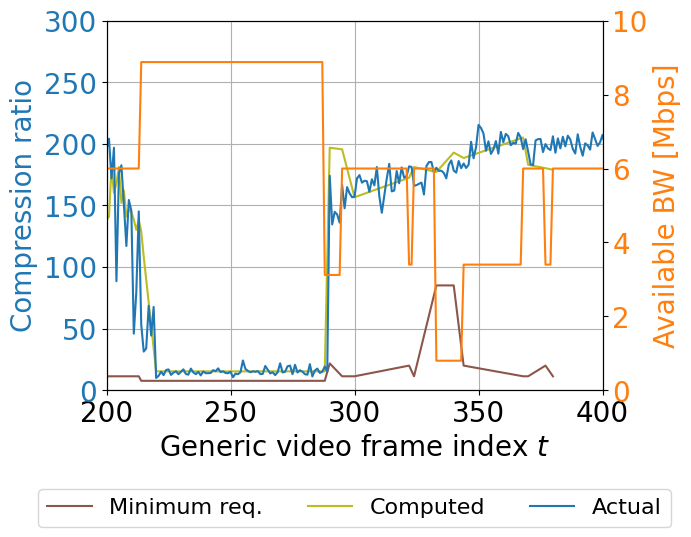

In [39]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Compression ratio', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_cmp"].to_numpy(),color="tab:brown", label="Minimum req.")
ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_cmp"].to_numpy(),color="tab:olive", label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["compression_ratio"].to_numpy(),color="tab:blue", label="Actual")
# plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
ax1.set_xlim([200, 400])
ax1.set_ylim([0,300])
ax2.set_ylim([0,10])
ax1.grid()
# plt.savefig("./images/jpeg_cmp_ratio.pdf", bbox_inches='tight')

# Bandwidth

Text(0, 0.5, 'Bandwidth [Mbps]')

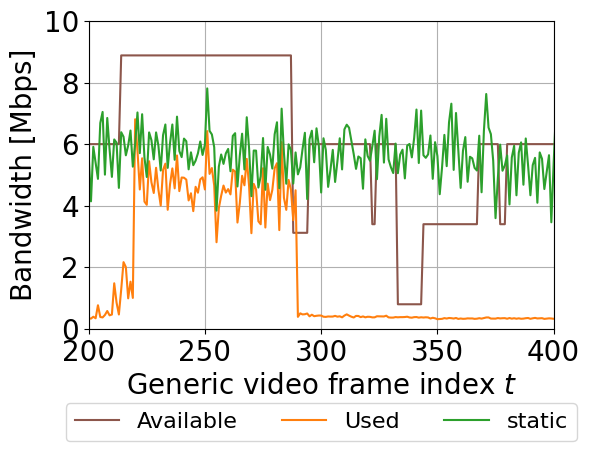

In [40]:
plt.figure(figsize=(6,4))


# feasibility = map_df["feasible"].to_numpy()
# for i in range(len(feasibility)):
#     if feasibility[i] == 1:
#         plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
#     else:
#         plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:brown",label="Available")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6,color="tab:orange",label="Used")
plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["consumed_bw"]/1e6,color="tab:green",label="static")
# plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")
plt.xlim([200,400])
plt.ylim([0,10])
plt.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Bandwidth [Mbps]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_bandwidth.pdf", bbox_inches='tight')

# SNR

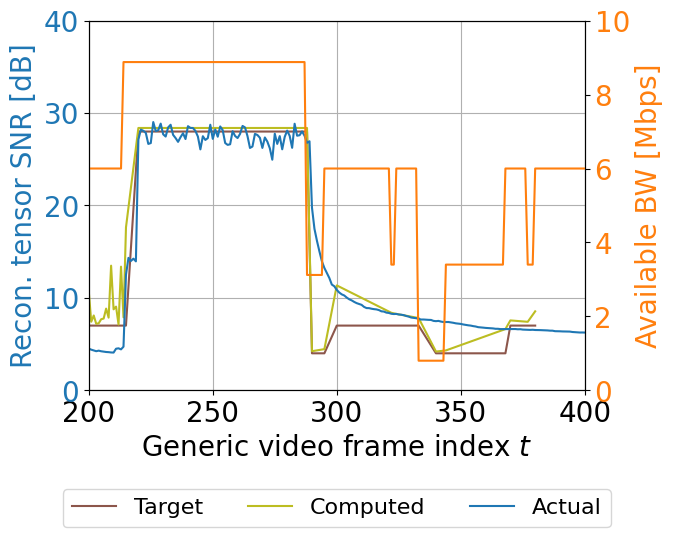

In [41]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Recon. tensor SNR [dB]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_snr"],color="tab:brown",label="Target")
ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_snr"],color="tab:olive",label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["reconstruct_snr"],color="tab:blue",label="Actual")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:blue",label="Static")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
ax1.set_xlim([200, 400])
ax1.set_ylim([0,40])
ax2.set_ylim([0,10])
ax1.grid()
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_snr.pdf", bbox_inches='tight')